In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
user_events = pd.read_csv('Encrypted Datasets/filtered_user_events.csv')
user_segments = pd.read_csv('Encrypted Datasets/user_segment_slice.csv')
body_users = pd.read_csv('Encrypted Datasets/body_users.csv')

In [5]:
user_events.head()

id  user_id                      name                 date_mod
0  778739492  5970559   Trade result successful  2025-01-01 00:00:08.018
1  778739498  8835246            User logged in  2025-01-01 00:00:09.433
2  778739499  8835246  Authentication completed  2025-01-01 00:00:09.440
3  778739501  8835246            User logged in  2025-01-01 00:00:10.109
4  778739502  8835246  Authentication completed  2025-01-01 00:00:10.114

In [7]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å—Ç–æ–ª–±—Ü—ã —Å –¥–∞—Ç–∞–º–∏ –≤ datetime
user_events['date_mod'] = pd.to_datetime(user_events['date_mod'])


In [11]:
# –ê–Ω–∞–ª–∏–∑ –æ–±—â–µ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏
user_activity = user_events.groupby('user_id').agg(
    total_events=('id', 'count'),
    unique_events=('name', 'nunique'),
    first_event_date=('date_mod', 'min'),
    last_event_date=('date_mod', 'max'),
    active_days=('date_mod', lambda x: x.dt.date.nunique())
).reset_index()

# –†–∞—Å—á–µ—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –º–µ—Ç—Ä–∏–∫
user_activity['activity_duration_days'] = (user_activity['last_event_date'] - user_activity['first_event_date']).dt.days
user_activity['events_per_day'] = user_activity['total_events'] / user_activity['activity_duration_days'].replace(0, 1)
user_activity['avg_daily_events'] = user_activity['total_events'] / user_activity['active_days'].replace(0, 1)

# –ó–∞–º–µ–Ω—è–µ–º –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ 0
user_activity = user_activity.replace([np.inf, -np.inf], 0)

In [12]:
user_activity.head()

user_id  total_events  unique_events        first_event_date  \
0   151692           123              8 2025-01-15 16:20:32.654   
1   314546             5              4 2025-01-18 05:25:00.496   
2   399125             1              1 2025-01-18 04:16:48.089   
3   413506             1              1 2025-01-18 04:46:54.763   
4   775310            78              7 2025-01-18 08:26:07.463   

          last_event_date  active_days  activity_duration_days  \
0 2025-06-28 14:43:16.679           88                     163   
1 2025-05-19 15:05:26.468            3                     121   
2 2025-01-18 04:16:48.089            1                       0   
3 2025-01-18 04:46:54.763            1                       0   
4 2025-06-27 16:05:55.341           29                     160   

   events_per_day  avg_daily_events  
0        0.754601          1.397727  
1        0.041322          1.666667  
2        1.000000          1.000000  
3        1.000000          1.000000  
4        0.487500          2.689655

In [13]:
user_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419215 entries, 0 to 419214
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   user_id                 419215 non-null  int64         
 1   total_events            419215 non-null  int64         
 2   unique_events           419215 non-null  int64         
 3   first_event_date        419215 non-null  datetime64[ns]
 4   last_event_date         419215 non-null  datetime64[ns]
 5   active_days             419215 non-null  int64         
 6   activity_duration_days  419215 non-null  int64         
 7   events_per_day          419215 non-null  float64       
 8   avg_daily_events        419215 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(5)
memory usage: 28.8 MB


In [33]:
# –°–æ–∑–¥–∞–µ–º –º–∞–ø–ø–∏–Ω–≥ –∏–∑ user_segment
user_id_mapping = user_segments[['user_id', 'original_client_user_id']].drop_duplicates()

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –º–∞–ø–ø–∏–Ω–≥
print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö user_id –≤ –º–∞–ø–ø–∏–Ω–≥–µ: {user_id_mapping['user_id'].nunique()}")
print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö original_user_id –≤ –º–∞–ø–ø–∏–Ω–≥–µ: {user_id_mapping['original_client_user_id'].nunique()}")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –µ—Å—Ç—å –ª–∏ user_id —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ original_user_id
mapping_check = user_id_mapping.groupby('user_id').size()
if any(mapping_check > 1):
    print("–í–Ω–∏–º–∞–Ω–∏–µ: –µ—Å—Ç—å user_id —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ original_client_user_id")
    print(mapping_check[mapping_check > 1])
    # –ë–µ—Ä–µ–º –ø–µ—Ä–≤—ã–π original_user_id –¥–ª—è –∫–∞–∂–¥–æ–≥–æ user_id
    user_id_mapping = user_id_mapping.groupby('user_id').first().reset_index()
else:
    print("–ú–∞–ø–ø–∏–Ω–≥ user_id -> original_client_user_id –∫–æ—Ä—Ä–µ–∫—Ç–µ–Ω")

–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö user_id –≤ –º–∞–ø–ø–∏–Ω–≥–µ: 516128
–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö original_user_id –≤ –º–∞–ø–ø–∏–Ω–≥–µ: 261541
–í–Ω–∏–º–∞–Ω–∏–µ: –µ—Å—Ç—å user_id —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ original_client_user_id
user_id
1337780     2
1337883     2
1408744     2
1409212     2
1447920     2
           ..
11897930    2
11898272    2
12005804    2
12608990    2
12615398    2
Length: 152, dtype: int64


In [35]:
# –û–±—ä–µ–¥–∏–Ω—è–µ–º user_events —Å –º–∞–ø–ø–∏–Ω–≥–æ–º
user_events_with_original = user_events.merge(
    user_id_mapping,
    on='user_id',
    how='left'
)

# –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print(f"–†–∞–∑–º–µ—Ä –∏—Å—Ö–æ–¥–Ω–æ–≥–æ user_events: {len(user_events)}")
print(f"–†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è: {len(user_events_with_original)}")
print(f"–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö original_client_user_id: {user_events_with_original['original_client_user_id'].isna().sum()}")
print(f"–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤: {(user_events_with_original['original_client_user_id'].isna().sum() / len(user_events_with_original) * 100):.2f}%")

# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø–µ—Ä–≤—ã–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫
print("\n–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫ user_events_with_original:")
print(user_events_with_original[['user_id', 'original_client_user_id', 'name', 'date_mod']].head())

–†–∞–∑–º–µ—Ä –∏—Å—Ö–æ–¥–Ω–æ–≥–æ user_events: 27742819
–†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è: 27742819
–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö original_client_user_id: 0
–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤: 0.00%

–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫ user_events_with_original:
   user_id  original_client_user_id                      name  \
0  5970559               2814994585   Trade result successful   
1  8835246               9290835338            User logged in   
2  8835246               9290835338  Authentication completed   
3  8835246               9290835338            User logged in   
4  8835246               9290835338  Authentication completed   

                 date_mod  
0 2025-01-01 00:00:08.018  
1 2025-01-01 00:00:09.433  
2 2025-01-01 00:00:09.440  
3 2025-01-01 00:00:10.109  
4 2025-01-01 00:00:10.114  


In [37]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º —Å–æ–±—ã—Ç–∏—è –ø–æ original_user_id
user_activity_agg = user_events_with_original.groupby('original_client_user_id').agg(
    total_events=('id', 'count'),
    unique_events=('name', 'nunique'),
    total_accounts=('user_id', 'nunique'),  # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—á–µ—Ç–æ–≤ —É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
    unique_categories=('name', 'nunique'),
    first_event_date=('date_mod', 'min'),
    last_event_date=('date_mod', 'max'),
    active_days=('date_mod', lambda x: x.dt.date.nunique())
).reset_index()

# –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫
user_activity_agg['activity_duration_days'] = (user_activity_agg['last_event_date'] - user_activity_agg['first_event_date']).dt.days
user_activity_agg['events_per_day'] = user_activity_agg['total_events'] / user_activity_agg['activity_duration_days'].replace(0, 1)
user_activity_agg['avg_daily_events'] = user_activity_agg['total_events'] / user_activity_agg['active_days'].replace(0, 1)
user_activity_agg = user_activity_agg.replace([np.inf, -np.inf], 0)

print(f"–°–æ–∑–¥–∞–Ω–æ {len(user_activity_agg)} –∑–∞–ø–∏—Å–µ–π –Ω–∞ —É—Ä–æ–≤–Ω–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π")

–°–æ–∑–¥–∞–Ω–æ 210103 –∑–∞–ø–∏—Å–µ–π –Ω–∞ —É—Ä–æ–≤–Ω–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π


In [38]:
# –°–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –ø–æ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –Ω–∞ —É—Ä–æ–≤–Ω–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
def create_user_activity_segments(row):
    total_events = row['total_events']
    if total_events >= 200:
        return '–°—É–ø–µ—Ä-–∞–∫—Ç–∏–≤–Ω—ã–µ'
    elif total_events >= 100:
        return '–û—á–µ–Ω—å –∞–∫—Ç–∏–≤–Ω—ã–µ'
    elif total_events >= 50:
        return '–ê–∫—Ç–∏–≤–Ω—ã–µ'
    elif total_events >= 20:
        return '–£–º–µ—Ä–µ–Ω–Ω—ã–µ'
    elif total_events >= 5:
        return '–ü–∞—Å—Å–∏–≤–Ω—ã–µ'
    else:
        return '–ù–µ–∞–∫—Ç–∏–≤–Ω—ã–µ'

user_activity_agg['activity_segment'] = user_activity_agg.apply(create_user_activity_segments, axis=1)

# –ü–æ—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
segment_distribution = user_activity_agg['activity_segment'].value_counts()
print("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏:")
print(segment_distribution)

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏:
activity_segment
–ù–µ–∞–∫—Ç–∏–≤–Ω—ã–µ        59609
–£–º–µ—Ä–µ–Ω–Ω—ã–µ         44296
–°—É–ø–µ—Ä-–∞–∫—Ç–∏–≤–Ω—ã–µ    34655
–û—á–µ–Ω—å –∞–∫—Ç–∏–≤–Ω—ã–µ    27122
–ü–∞—Å—Å–∏–≤–Ω—ã–µ         25888
–ê–∫—Ç–∏–≤–Ω—ã–µ          18533
Name: count, dtype: int64


In [53]:
# –û–±—ä–µ–¥–∏–Ω—è–µ–º —Å body_users
user_profiles_complete = user_activity_agg.merge(
    body_users[['original_client_user_id', 'sex_type', 'age_segment', '–ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è']],
    on='original_client_user_id',
    how='left'
)

# –î–æ–±–∞–≤–ª—è–µ–º —Å–µ–≥–º–µ–Ω—Ç—ã –∞–∫—Ç–∏–≤–æ–≤ - –±–µ—Ä–µ–º –ú–ê–ö–°–ò–ú–ê–õ–¨–ù–´–ô —Å–µ–≥–º–µ–Ω—Ç –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
# (—Ç–∞–∫ –∫–∞–∫ 12 = –º–Ω–æ–≥–æ –∞–∫—Ç–∏–≤–æ–≤ = –ª—É—á—à–µ)
user_segment_agg = user_segments.groupby('original_client_user_id').agg({
    'user_segment_in_reception_id': 'max'  # –±–µ—Ä–µ–º –Ω–∞–∏–≤—ã—Å—à–∏–π —Å–µ–≥–º–µ–Ω—Ç –∞–∫—Ç–∏–≤–æ–≤
}).reset_index()

user_segment_agg = user_segment_agg.rename(columns={'user_segment_in_reception_id': 'asset_segment'})

# –û–±—ä–µ–¥–∏–Ω—è–µ–º —Å –Ω–∞—à–∏–º–∏ –¥–∞–Ω–Ω—ã–º–∏
user_profiles_complete = user_activity_agg.merge(
    user_segment_agg,
    on='original_client_user_id',
    how='left'
)

print(f"–ò—Ç–æ–≥–æ–≤—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞: {user_profiles_complete.shape}")

–ò—Ç–æ–≥–æ–≤—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞: (210103, 13)


In [54]:
# –°–Ω–∞—á–∞–ª–∞ –ø—Ä–æ–≤–µ—Ä–∏–º, –∫–∞–∫–∏–µ —Å—Ç–æ–ª–±—Ü—ã –µ—Å—Ç—å –≤ body_users
print("–°—Ç–æ–ª–±—Ü—ã –≤ body_users:")
print(body_users.columns.tolist())

# –î–æ–±–∞–≤–ª—è–µ–º –ö–∞–Ω–∞–ª –ü—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è –∏ –¥—Ä—É–≥–∏–µ –¥–µ–º–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ
user_profiles_complete = user_profiles_complete.merge(
    body_users[['original_client_user_id', 'sex_type', 'age_segment', '–ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è', 'acquisition_channel_lvl_2', 'acquisition_channel_lvl_3']],
    on='original_client_user_id',
    how='left'
)

print(f"–ò—Ç–æ–≥–æ–≤—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞: {user_profiles_complete.shape}")
print("\n–ü–µ—Ä–≤—ã–µ 3 —Å—Ç—Ä–æ–∫–∏:")
print(user_profiles_complete[['original_client_user_id', 'activity_segment', 'asset_segment', '–ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è']].head(3))

–°—Ç–æ–ª–±—Ü—ã –≤ body_users:
['id', 'original_client_user_id', 'sex_type', 'age_segment', '–ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è', 'acquisition_channel_lvl_2', 'acquisition_channel_lvl_3']
–ò—Ç–æ–≥–æ–≤—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞: (429452, 18)

–ü–µ—Ä–≤—ã–µ 3 —Å—Ç—Ä–æ–∫–∏:
   original_client_user_id activity_segment  asset_segment –ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è
0               1000032864       –ù–µ–∞–∫—Ç–∏–≤–Ω—ã–µ              2          –û—Ä–≥–∞–Ω–∏–∫–∞
1               1000032864       –ù–µ–∞–∫—Ç–∏–≤–Ω—ã–µ              2          –û—Ä–≥–∞–Ω–∏–∫–∞
2               1000092840        –ü–∞—Å—Å–∏–≤–Ω—ã–µ              2   –†–µ—Ñ–µ—Ä–∞–ª–∫–∞ Sales


In [55]:
user_profiles_complete.head()

original_client_user_id  total_events  unique_events  total_accounts  \
0               1000032864             2              1               2   
1               1000032864             2              1               2   
2               1000092840            10              2               2   
3               1000092840            10              2               2   
4               1000145069             8              3               2   

   unique_categories        first_event_date         last_event_date  \
0                  1 2025-01-18 07:26:53.233 2025-01-18 11:00:50.040   
1                  1 2025-01-18 07:26:53.233 2025-01-18 11:00:50.040   
2                  2 2025-01-18 06:48:14.327 2025-05-15 04:01:13.973   
3                  2 2025-01-18 06:48:14.327 2025-05-15 04:01:13.973   
4                  3 2025-01-18 06:20:16.652 2025-05-26 16:59:20.582   

   active_days  activity_duration_days  events_per_day  avg_daily_events  \
0            1                       0        2.000000          2.000000   
1            1                       0        2.000000          2.000000   
2            5                     116        0.086207          2.000000   
3            5                     116        0.086207          2.000000   
4            3                     128        0.062500          2.666667   

  activity_segment  asset_segment sex_type age_segment –ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è  \
0       –ù–µ–∞–∫—Ç–∏–≤–Ω—ã–µ              2        –ñ   25-34 –ª–µ—Ç          –û—Ä–≥–∞–Ω–∏–∫–∞   
1       –ù–µ–∞–∫—Ç–∏–≤–Ω—ã–µ              2        –ñ   25-34 –ª–µ—Ç          –û—Ä–≥–∞–Ω–∏–∫–∞   
2        –ü–∞—Å—Å–∏–≤–Ω—ã–µ              2        –ñ    55 –ª–µ—Ç +   –†–µ—Ñ–µ—Ä–∞–ª–∫–∞ Sales   
3        –ü–∞—Å—Å–∏–≤–Ω—ã–µ              2        –ñ    55 –ª–µ—Ç +   –†–µ—Ñ–µ—Ä–∞–ª–∫–∞ Sales   
4        –ü–∞—Å—Å–∏–≤–Ω—ã–µ              3        –ñ   45-54 –ª–µ—Ç      –ú–∞—Ä–∫–µ—Ç–∏–Ω–≥ KZ   

  acquisition_channel_lvl_2 acquisition_channel_lvl_3  
0                  –û—Ä–≥–∞–Ω–∏–∫–∞                  –û—Ä–≥–∞–Ω–∏–∫–∞  
1                  –û—Ä–≥–∞–Ω–∏–∫–∞                  –û—Ä–≥–∞–Ω–∏–∫–∞  
2           –†–µ—Ñ–µ—Ä–∞–ª–∫–∞ Sales           –†–µ—Ñ–µ—Ä–∞–ª–∫–∞ Sales  
3           –†–µ—Ñ–µ—Ä–∞–ª–∫–∞ Sales           –†–µ—Ñ–µ—Ä–∞–ª–∫–∞ Sales  
4                   –õ–µ–Ω–¥–∏–Ω–≥                    ffinkz

–í–æ–∑—å–º–µ–º –ê–∫—Ç–∏–≤–Ω—ã—Ö, –æ—á–µ–Ω—å –∞–∫—Ç–∏–≤–Ω—ã—Ö –∏ —Å—É–ø–µ—Ä –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π. –≠—Ç–æ –Ω–∞—à–∏ –ø–æ—Ä—Ç—Ä–µ—Ç—ã —Ü–µ–ª–≤—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤

In [64]:
# –§–∏–ª—å—Ç—Ä—É–µ–º –≤—Å–µ—Ö –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π (–∞–∫—Ç–∏–≤–Ω—ã–µ, –æ—á–µ–Ω—å –∞–∫—Ç–∏–≤–Ω—ã–µ –∏ —Å—É–ø–µ—Ä –∞–∫—Ç–∏–≤–Ω—ã–µ)
active_users = user_profiles_complete[
    user_profiles_complete['activity_segment'].isin(['–ê–∫—Ç–∏–≤–Ω—ã–µ', '–û—á–µ–Ω—å –∞–∫—Ç–∏–≤–Ω—ã–µ', '–°—É–ø–µ—Ä-–∞–∫—Ç–∏–≤–Ω—ã–µ'])
].copy()

print(f"–í—Å–µ–≥–æ –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: {len(active_users)}")

–í—Å–µ–≥–æ –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: 167111


–†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ê–ö–¢–ò–í–ù–´–• –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–ï–ô –ü–û –ü–û–õ–£:
–ú: 63.9% (106857 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
–ñ: 35.8% (59737 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
–ù–µ —É–∫–∞–∑–∞–Ω–æ –∫–ª–∏–µ–Ω—Ç–æ–º: 0.3% (502 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)


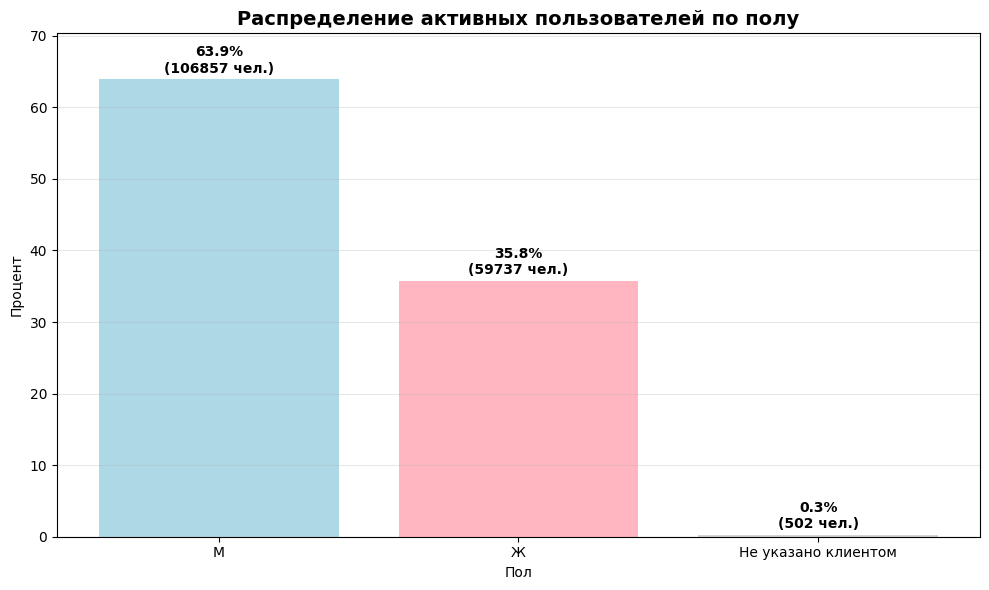

In [70]:
# –ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ –ø–æ–ª—É
gender_distribution = active_users['sex_type'].value_counts(normalize=True) * 100
gender_counts = active_users['sex_type'].value_counts()

print("–†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ê–ö–¢–ò–í–ù–´–• –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–ï–ô –ü–û –ü–û–õ–£:")
print("=" * 50)
for gender, percentage in gender_distribution.items():
    count = gender_counts[gender]
    print(f"{gender}: {percentage:.1f}% ({count} –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å —á–∏—Å–ª–∞–º–∏
plt.figure(figsize=(10, 6))
bars = plt.bar(gender_distribution.index, gender_distribution.values, 
               color=['lightblue', 'lightpink', 'lightgray'])

# –î–æ–±–∞–≤–ª—è–µ–º —á–∏—Å–ª–∞ –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar, percentage, count in zip(bars, gender_distribution.values, gender_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{percentage:.1f}%\n({count} —á–µ–ª.)',
             ha='center', va='bottom', fontweight='bold')

plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ –ø–æ–ª—É', fontweight='bold', fontsize=14)
plt.ylabel('–ü—Ä–æ—Ü–µ–Ω—Ç')
plt.xlabel('–ü–æ–ª')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(gender_distribution.values) * 1.1)
plt.tight_layout()
plt.show()

–†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ê–ö–¢–ò–í–ù–´–• –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–ï–ô –ü–û –í–û–ó–†–ê–°–¢–£:
35-44 –ª–µ—Ç: 32.6% (54441 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
25-34 –ª–µ—Ç: 25.7% (42876 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
45-54 –ª–µ—Ç: 19.5% (32522 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
18-24 –ª–µ—Ç: 11.4% (19102 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
55 –ª–µ—Ç +: 10.7% (17823 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
–ù–µ —É–∫–∞–∑–∞–Ω–æ –∫–ª–∏–µ–Ω—Ç–æ–º: 0.2% (332 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)


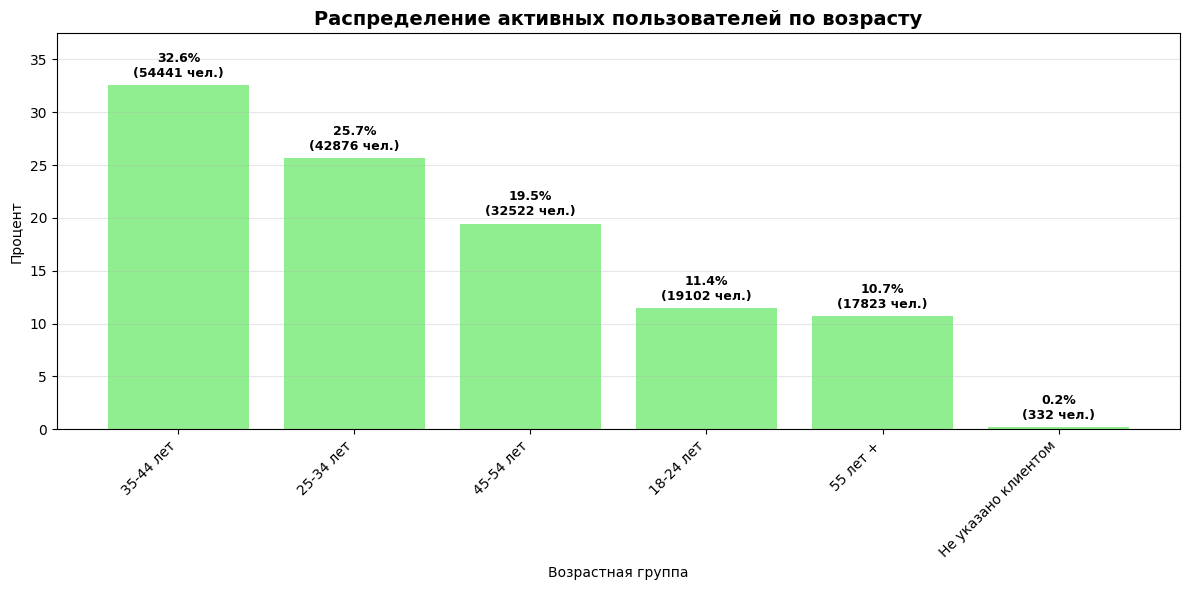

In [71]:
# –ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É
age_distribution = active_users['age_segment'].value_counts(normalize=True) * 100
age_counts = active_users['age_segment'].value_counts()

print("–†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ê–ö–¢–ò–í–ù–´–• –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–ï–ô –ü–û –í–û–ó–†–ê–°–¢–£:")
print("=" * 50)
for age, percentage in age_distribution.items():
    count = age_counts[age]
    print(f"{age}: {percentage:.1f}% ({count} –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å —á–∏—Å–ª–∞–º–∏
plt.figure(figsize=(12, 6))
bars = plt.bar(age_distribution.index, age_distribution.values, color='lightgreen')

# –î–æ–±–∞–≤–ª—è–µ–º —á–∏—Å–ª–∞ –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar, percentage, count in zip(bars, age_distribution.values, age_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{percentage:.1f}%\n({count} —á–µ–ª.)',
             ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É', fontweight='bold', fontsize=14)
plt.ylabel('–ü—Ä–æ—Ü–µ–Ω—Ç')
plt.xlabel('–í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(age_distribution.values) * 1.15)
plt.tight_layout()
plt.show()

–¢–û–ü –ö–ê–ù–ê–õ–û–í –ü–†–ò–í–õ–ï–ß–ï–ù–ò–Ø –ê–ö–¢–ò–í–ù–´–• –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–ï–ô:
1. –û—Ä–≥–∞–Ω–∏–∫–∞: 42.6% (71195 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
2. –†–µ—Ñ–µ—Ä–∞–ª–∫–∞ Sales: 33.5% (56018 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
3. –ú–∞—Ä–∫–µ—Ç–∏–Ω–≥ KZ: 23.9% (39883 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)


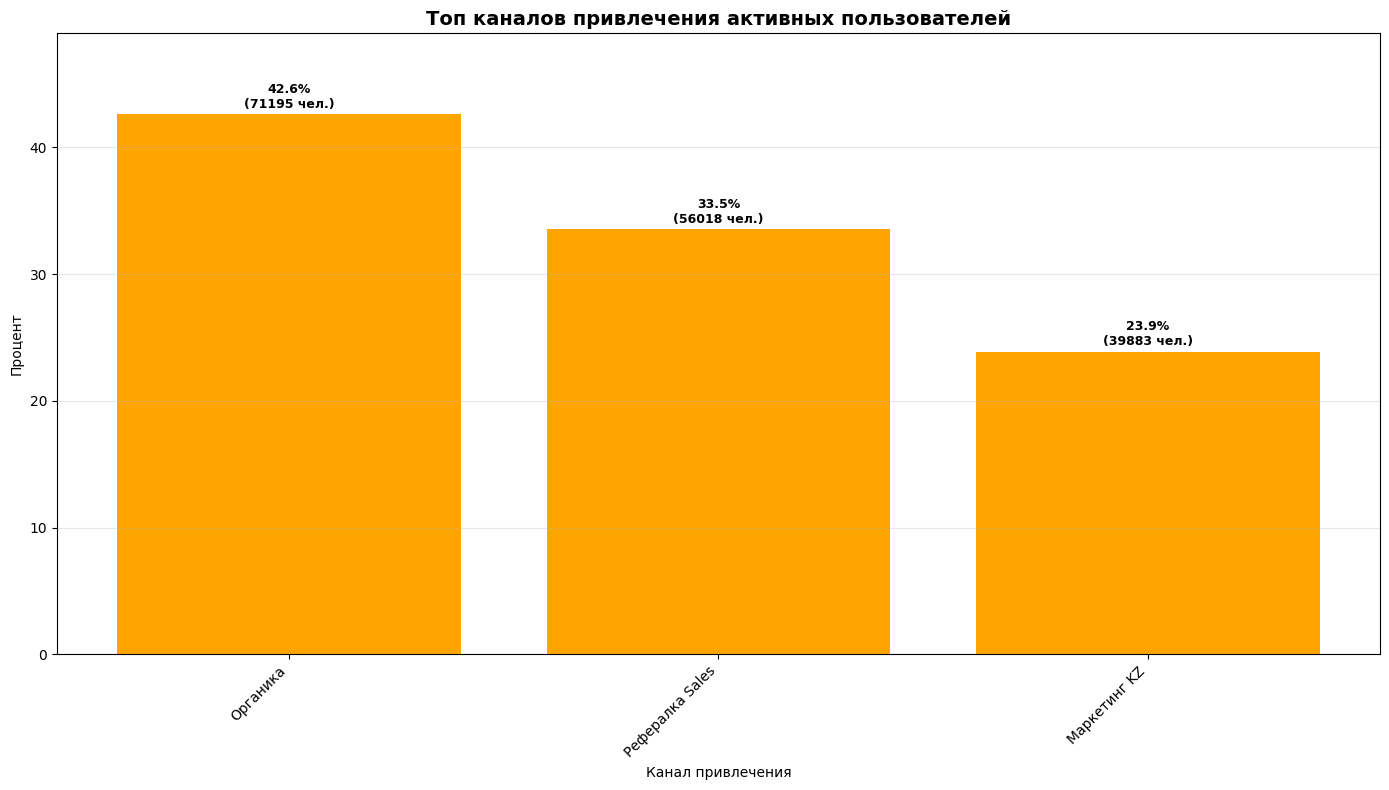

In [76]:
# –ê–Ω–∞–ª–∏–∑ –∫–∞–Ω–∞–ª–æ–≤ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è
channel_distribution = active_users['–ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è'].value_counts(normalize=True) * 100
channel_counts = active_users['–ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è'].value_counts()

print("–¢–û–ü –ö–ê–ù–ê–õ–û–í –ü–†–ò–í–õ–ï–ß–ï–ù–ò–Ø –ê–ö–¢–ò–í–ù–´–• –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–ï–ô:")
print("=" * 60)
for i, (channel, percentage) in enumerate(channel_distribution.head(10).items(), 1):
    count = channel_counts[channel]
    print(f"{i}. {channel}: {percentage:.1f}% ({count} –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ç–æ–ø-10 –∫–∞–Ω–∞–ª–æ–≤ —Å —á–∏—Å–ª–∞–º–∏
plt.figure(figsize=(14, 8))
top_10_channels = channel_distribution.head(10)
top_10_counts = channel_counts.head(10)

bars = plt.bar(top_10_channels.index, top_10_channels.values, color='orange')

# –î–æ–±–∞–≤–ª—è–µ–º —á–∏—Å–ª–∞ –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar, percentage, count in zip(bars, top_10_channels.values, top_10_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             f'{percentage:.1f}%\n({count} —á–µ–ª.)',
             ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title('–¢–æ–ø –∫–∞–Ω–∞–ª–æ–≤ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π', fontweight='bold', fontsize=14)
plt.ylabel('–ü—Ä–æ—Ü–µ–Ω—Ç')
plt.xlabel('–ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(top_10_channels.values) * 1.15)
plt.tight_layout()
plt.show()

–ë–∞–Ω–∫ –∏ –ë–µ–ª–∏–∑ –Ω–µ –ø—Ä–∏–Ω–æ—Å—è—Ç –∞–∫—Ç–∏–≤–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤

In [75]:
# –°–æ–∑–¥–∞–µ–º —Å–≤–æ–¥–Ω—ã–π –ø–æ—Ä—Ç—Ä–µ—Ç —Å —Ç–æ—á–Ω—ã–º–∏ —á–∏—Å–ª–∞–º–∏
most_common_gender = active_users['sex_type'].mode()[0]
most_common_age = active_users['age_segment'].mode()[0]
most_common_channel = active_users['–ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è'].mode()[0]

gender_percentage = gender_distribution[most_common_gender]
age_percentage = age_distribution[most_common_age]
channel_percentage = channel_distribution[most_common_channel]

gender_count = gender_counts[most_common_gender]
age_count = age_counts[most_common_age]
channel_count = channel_counts[most_common_channel]

print("–°–í–û–î–ù–´–ô –ü–û–†–¢–†–ï–¢ –ê–ö–¢–ò–í–ù–û–ì–û –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–Ø:")
print("=" * 60)
print(f"üéØ –¢–∏–ø–∏—á–Ω—ã–π –∞–∫—Ç–∏–≤–Ω—ã–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å:")
print(f"   ‚Ä¢ –ü–æ–ª: {most_common_gender} ({gender_percentage:.1f}%, {gender_count} –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)")
print(f"   ‚Ä¢ –í–æ–∑—Ä–∞—Å—Ç: {most_common_age} ({age_percentage:.1f}%, {age_count} –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)")
print(f"   ‚Ä¢ –ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è: {most_common_channel} ({channel_percentage:.1f}%, {channel_count} –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)")
print(f"   ‚Ä¢ –í—Å–µ–≥–æ –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: {len(active_users)}")
print(f"   ‚Ä¢ –î–æ–ª—è –æ—Ç –≤—Å–µ—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: {(len(active_users) / len(user_profiles_complete) * 100):.1f}%")

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Å —á–∏—Å–ª–∞–º–∏
print(f"\nüìä –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:")
print(f"   ‚Ä¢ –ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–±—ã—Ç–∏–π: {active_users['total_events'].median():.0f}")
print(f"   ‚Ä¢ –ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∞–∫—Ç–∏–≤–Ω—ã—Ö –¥–Ω–µ–π: {active_users['active_days'].median():.0f}")
print(f"   ‚Ä¢ –ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—á–µ—Ç–æ–≤: {active_users['total_accounts'].median():.0f}")

–°–í–û–î–ù–´–ô –ü–û–†–¢–†–ï–¢ –ê–ö–¢–ò–í–ù–û–ì–û –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–Ø:
üéØ –¢–∏–ø–∏—á–Ω—ã–π –∞–∫—Ç–∏–≤–Ω—ã–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å:
   ‚Ä¢ –ü–æ–ª: –ú (63.9%, 106857 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
   ‚Ä¢ –í–æ–∑—Ä–∞—Å—Ç: 35-44 –ª–µ—Ç (32.6%, 54441 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
   ‚Ä¢ –ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è: –û—Ä–≥–∞–Ω–∏–∫–∞ (42.6%, 71195 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
   ‚Ä¢ –í—Å–µ–≥–æ –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: 167111
   ‚Ä¢ –î–æ–ª—è –æ—Ç –≤—Å–µ—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: 38.9%

üìä –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:
   ‚Ä¢ –ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–±—ã—Ç–∏–π: 171
   ‚Ä¢ –ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∞–∫—Ç–∏–≤–Ω—ã—Ö –¥–Ω–µ–π: 75
   ‚Ä¢ –ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—á–µ—Ç–æ–≤: 2


–¢–µ–ø–µ—Ä—å —Å—Ñ–æ—Ä–º–∏—Ä—É–µ–º –ø–æ—Ä—Ç—Ä–µ—Ç –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —É –∫–æ—Ç–æ—Ä—ã—Ö –º–Ω–æ–≥–æ –∞–∫—Ç–∏–≤–æ–≤

In [77]:
# –§–∏–ª—å—Ç—Ä—É–µ–º –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å —Å–µ–≥–º–µ–Ω—Ç–æ–º –∞–∫—Ç–∏–≤–æ–≤ 9-12 (–±–æ–≥–∞—Ç—ã–µ)
wealthy_active_users = active_users[
    (active_users['asset_segment'] != '–ù–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω') & 
    (active_users['asset_segment'].astype(int) >= 9)
].copy()

print(f"–ê–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å –≤—ã—Å–æ–∫–∏–º–∏ –∞–∫—Ç–∏–≤–∞–º–∏ (9-12): {len(wealthy_active_users)}")
print(f"–î–æ–ª—è –æ—Ç –≤—Å–µ—Ö –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: {(len(wealthy_active_users) / len(active_users) * 100):.1f}%")

# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º –∞–∫—Ç–∏–≤–æ–≤
asset_distribution = wealthy_active_users['asset_segment'].value_counts().sort_index()
print("\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º –∞–∫—Ç–∏–≤–æ–≤:")
for segment, count in asset_distribution.items():
    print(f"–°–µ–≥–º–µ–Ω—Ç {segment}: {count} –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π")

–ê–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å –≤—ã—Å–æ–∫–∏–º–∏ –∞–∫—Ç–∏–≤–∞–º–∏ (9-12): 12389
–î–æ–ª—è –æ—Ç –≤—Å–µ—Ö –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: 7.4%

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º –∞–∫—Ç–∏–≤–æ–≤:
–°–µ–≥–º–µ–Ω—Ç 9: 5368 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–°–µ–≥–º–µ–Ω—Ç 10: 4006 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–°–µ–≥–º–µ–Ω—Ç 11: 1588 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–°–µ–≥–º–µ–Ω—Ç 12: 1427 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π


–†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ë–û–ì–ê–¢–´–• –ê–ö–¢–ò–í–ù–´–• –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–ï–ô –ü–û –ü–û–õ–£:
–ú: 73.1% (9054 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
–ñ: 24.9% (3088 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
–ù–µ —É–∫–∞–∑–∞–Ω–æ –∫–ª–∏–µ–Ω—Ç–æ–º: 2.0% (245 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)


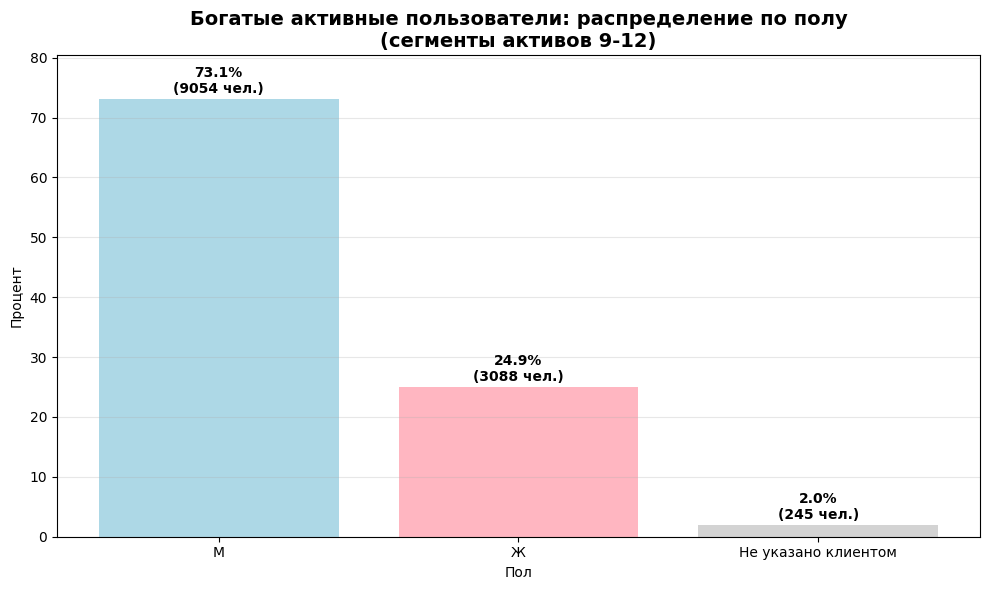

In [79]:
# –ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ –ø–æ–ª—É
gender_distribution_wealthy = wealthy_active_users['sex_type'].value_counts(normalize=True) * 100
gender_counts_wealthy = wealthy_active_users['sex_type'].value_counts()

print("–†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ë–û–ì–ê–¢–´–• –ê–ö–¢–ò–í–ù–´–• –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–ï–ô –ü–û –ü–û–õ–£:")
print("=" * 60)
for gender, percentage in gender_distribution_wealthy.items():
    count = gender_counts_wealthy[gender]
    print(f"{gender}: {percentage:.1f}% ({count} –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å —á–∏—Å–ª–∞–º–∏
plt.figure(figsize=(10, 6))
bars = plt.bar(gender_distribution_wealthy.index, gender_distribution_wealthy.values, 
               color=['lightblue', 'lightpink', 'lightgray'])

# –î–æ–±–∞–≤–ª—è–µ–º —á–∏—Å–ª–∞ –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar, percentage, count in zip(bars, gender_distribution_wealthy.values, gender_counts_wealthy.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{percentage:.1f}%\n({count} —á–µ–ª.)',
             ha='center', va='bottom', fontweight='bold')

plt.title('–ë–æ–≥–∞—Ç—ã–µ –∞–∫—Ç–∏–≤–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø–æ–ª—É\n(—Å–µ–≥–º–µ–Ω—Ç—ã –∞–∫—Ç–∏–≤–æ–≤ 9-12)', fontweight='bold', fontsize=14)
plt.ylabel('–ü—Ä–æ—Ü–µ–Ω—Ç')
plt.xlabel('–ü–æ–ª')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(gender_distribution_wealthy.values) * 1.1)
plt.tight_layout()
plt.show()

–†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ë–û–ì–ê–¢–´–• –ê–ö–¢–ò–í–ù–´–• –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–ï–ô –ü–û –í–û–ó–†–ê–°–¢–£:
45-54 –ª–µ—Ç: 33.3% (4126 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
55 –ª–µ—Ç +: 30.6% (3791 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
35-44 –ª–µ—Ç: 26.8% (3320 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
25-34 –ª–µ—Ç: 6.3% (783 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
–ù–µ —É–∫–∞–∑–∞–Ω–æ –∫–ª–∏–µ–Ω—Ç–æ–º: 1.9% (239 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
18-24 –ª–µ—Ç: 1.0% (128 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)


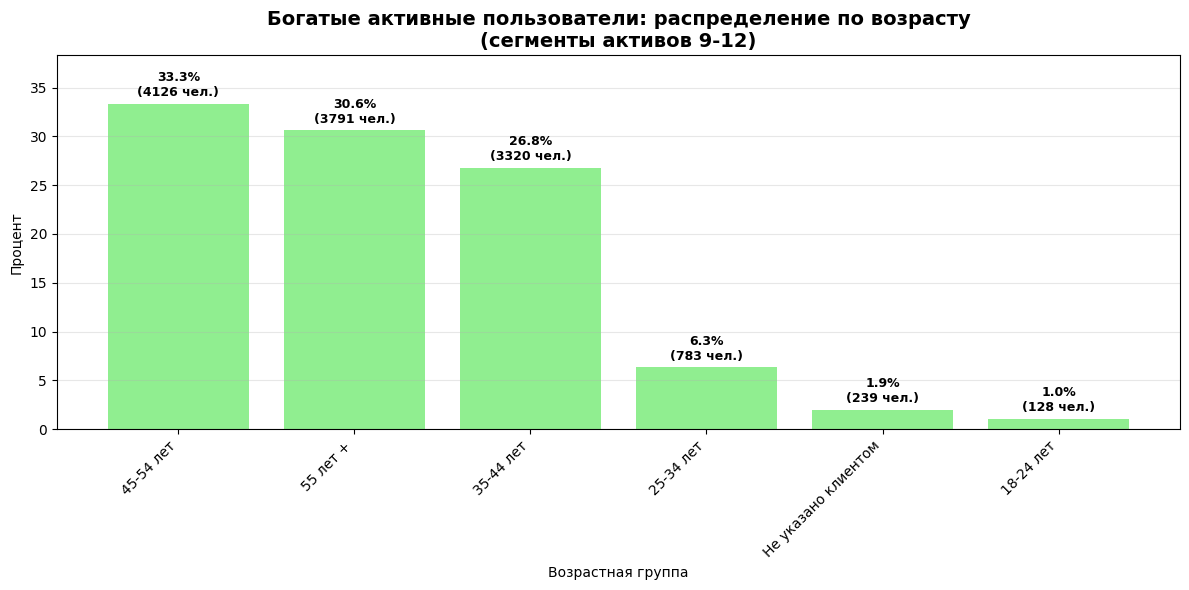

In [80]:
# –ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É
age_distribution_wealthy = wealthy_active_users['age_segment'].value_counts(normalize=True) * 100
age_counts_wealthy = wealthy_active_users['age_segment'].value_counts()

print("–†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ë–û–ì–ê–¢–´–• –ê–ö–¢–ò–í–ù–´–• –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–ï–ô –ü–û –í–û–ó–†–ê–°–¢–£:")
print("=" * 60)
for age, percentage in age_distribution_wealthy.items():
    count = age_counts_wealthy[age]
    print(f"{age}: {percentage:.1f}% ({count} –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å —á–∏—Å–ª–∞–º–∏
plt.figure(figsize=(12, 6))
bars = plt.bar(age_distribution_wealthy.index, age_distribution_wealthy.values, color='lightgreen')

# –î–æ–±–∞–≤–ª—è–µ–º —á–∏—Å–ª–∞ –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar, percentage, count in zip(bars, age_distribution_wealthy.values, age_counts_wealthy.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{percentage:.1f}%\n({count} —á–µ–ª.)',
             ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title('–ë–æ–≥–∞—Ç—ã–µ –∞–∫—Ç–∏–≤–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É\n(—Å–µ–≥–º–µ–Ω—Ç—ã –∞–∫—Ç–∏–≤–æ–≤ 9-12)', fontweight='bold', fontsize=14)
plt.ylabel('–ü—Ä–æ—Ü–µ–Ω—Ç')
plt.xlabel('–í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(age_distribution_wealthy.values) * 1.15)
plt.tight_layout()
plt.show()

–¢–û–ü –ö–ê–ù–ê–õ–û–í –ü–†–ò–í–õ–ï–ß–ï–ù–ò–Ø –ë–û–ì–ê–¢–´–• –ê–ö–¢–ò–í–ù–´–• –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–ï–ô:
1. –†–µ—Ñ–µ—Ä–∞–ª–∫–∞ Sales: 68.4% (8475 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
2. –û—Ä–≥–∞–Ω–∏–∫–∞: 19.7% (2446 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
3. –ú–∞—Ä–∫–µ—Ç–∏–Ω–≥ KZ: 11.8% (1466 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)


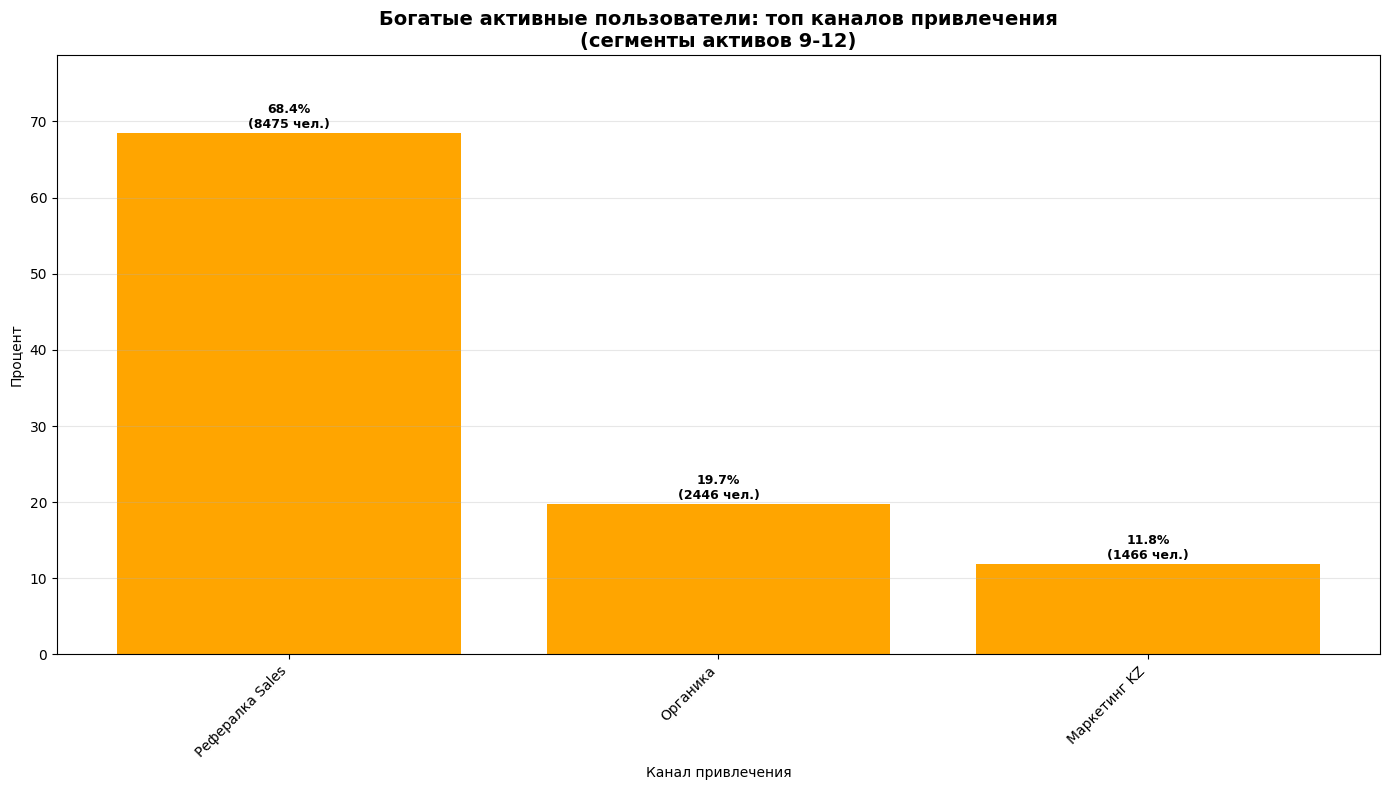

In [82]:
# –ê–Ω–∞–ª–∏–∑ —Ç–æ–ø-10 –∫–∞–Ω–∞–ª–æ–≤ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è
channel_distribution_wealthy = wealthy_active_users['–ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è'].value_counts(normalize=True) * 100
channel_counts_wealthy = wealthy_active_users['–ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è'].value_counts()

print("–¢–û–ü –ö–ê–ù–ê–õ–û–í –ü–†–ò–í–õ–ï–ß–ï–ù–ò–Ø –ë–û–ì–ê–¢–´–• –ê–ö–¢–ò–í–ù–´–• –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–ï–ô:")
print("=" * 70)
for i, (channel, percentage) in enumerate(channel_distribution_wealthy.head(10).items(), 1):
    count = channel_counts_wealthy[channel]
    print(f"{i}. {channel}: {percentage:.1f}% ({count} –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ç–æ–ø-10 –∫–∞–Ω–∞–ª–æ–≤ —Å —á–∏—Å–ª–∞–º–∏
plt.figure(figsize=(14, 8))
top_10_channels_wealthy = channel_distribution_wealthy.head(10)
top_10_counts_wealthy = channel_counts_wealthy.head(10)

bars = plt.bar(top_10_channels_wealthy.index, top_10_channels_wealthy.values, color='orange')

# –î–æ–±–∞–≤–ª—è–µ–º —á–∏—Å–ª–∞ –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar, percentage, count in zip(bars, top_10_channels_wealthy.values, top_10_counts_wealthy.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             f'{percentage:.1f}%\n({count} —á–µ–ª.)',
             ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title('–ë–æ–≥–∞—Ç—ã–µ –∞–∫—Ç–∏–≤–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏: —Ç–æ–ø –∫–∞–Ω–∞–ª–æ–≤ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è\n(—Å–µ–≥–º–µ–Ω—Ç—ã –∞–∫—Ç–∏–≤–æ–≤ 9-12)', fontweight='bold', fontsize=14)
plt.ylabel('–ü—Ä–æ—Ü–µ–Ω—Ç')
plt.xlabel('–ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(top_10_channels_wealthy.values) * 1.15)
plt.tight_layout()
plt.show()

In [84]:
# –°–æ–∑–¥–∞–µ–º —Å–≤–æ–¥–Ω—ã–π –ø–æ—Ä—Ç—Ä–µ—Ç —Å —Ç–æ—á–Ω—ã–º–∏ —á–∏—Å–ª–∞–º–∏
most_common_gender_wealthy = wealthy_active_users['sex_type'].mode()[0]
most_common_age_wealthy = wealthy_active_users['age_segment'].mode()[0]
most_common_channel_wealthy = wealthy_active_users['–ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è'].mode()[0]

gender_percentage_wealthy = gender_distribution_wealthy[most_common_gender_wealthy]
age_percentage_wealthy = age_distribution_wealthy[most_common_age_wealthy]
channel_percentage_wealthy = channel_distribution_wealthy[most_common_channel_wealthy]

gender_count_wealthy = gender_counts_wealthy[most_common_gender_wealthy]
age_count_wealthy = age_counts_wealthy[most_common_age_wealthy]
channel_count_wealthy = channel_counts_wealthy[most_common_channel_wealthy]

print("–°–í–û–î–ù–´–ô –ü–û–†–¢–†–ï–¢ –°–ê–ú–´–• –¶–ï–ù–ù–´–• –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–ï–ô:")
print("=" * 65)
print(f"üéØ –¢–∏–ø–∏—á–Ω—ã–π –±–æ–≥–∞—Ç—ã–π –∞–∫—Ç–∏–≤–Ω—ã–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å (–∞–∫—Ç–∏–≤—ã 9-12):")
print(f"   ‚Ä¢ –ü–æ–ª: {most_common_gender_wealthy} ({gender_percentage_wealthy:.1f}%, {gender_count_wealthy} –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)")
print(f"   ‚Ä¢ –í–æ–∑—Ä–∞—Å—Ç: {most_common_age_wealthy} ({age_percentage_wealthy:.1f}%, {age_count_wealthy} –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)")
print(f"   ‚Ä¢ –ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è: {most_common_channel_wealthy} ({channel_percentage_wealthy:.1f}%, {channel_count_wealthy} –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)")
print(f"   ‚Ä¢ –í—Å–µ–≥–æ –±–æ–≥–∞—Ç—ã—Ö –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: {len(wealthy_active_users)}")
print(f"   ‚Ä¢ –î–æ–ª—è –æ—Ç –≤—Å–µ—Ö –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: {(len(wealthy_active_users) / len(active_users) * 100):.1f}%")

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –æ–±—â–∏–º–∏ –∞–∫—Ç–∏–≤–Ω—ã–º–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º–∏
print(f"\nüìä –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –æ–±—â–∏–º–∏ –∞–∫—Ç–∏–≤–Ω—ã–º–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º–∏:")
print(f"   ‚Ä¢ –†–∞–∑–Ω–∏—Ü–∞ –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –ø–æ –ø–æ–ª—É: {abs(gender_percentage - gender_percentage_wealthy):.1f}%")
print(f"   ‚Ä¢ –†–∞–∑–Ω–∏—Ü–∞ –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É: {abs(age_percentage - age_percentage_wealthy):.1f}%")
print(f"   ‚Ä¢ –†–∞–∑–Ω–∏—Ü–∞ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –∫–∞–Ω–∞–ª–µ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è: {abs(channel_percentage - channel_percentage_wealthy):.1f}%")

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
print(f"\nüíº –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –±–æ–≥–∞—Ç—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π:")
print(f"   ‚Ä¢ –ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–±—ã—Ç–∏–π: {wealthy_active_users['total_events'].median():.0f}")
print(f"   ‚Ä¢ –ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∞–∫—Ç–∏–≤–Ω—ã—Ö –¥–Ω–µ–π: {wealthy_active_users['active_days'].median():.0f}")
print(f"   ‚Ä¢ –ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—á–µ—Ç–æ–≤: {wealthy_active_users['total_accounts'].median():.0f}")

–°–í–û–î–ù–´–ô –ü–û–†–¢–†–ï–¢ –°–ê–ú–´–• –¶–ï–ù–ù–´–• –ü–û–õ–¨–ó–û–í–ê–¢–ï–õ–ï–ô:
üéØ –¢–∏–ø–∏—á–Ω—ã–π –±–æ–≥–∞—Ç—ã–π –∞–∫—Ç–∏–≤–Ω—ã–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å (–∞–∫—Ç–∏–≤—ã 9-12):
   ‚Ä¢ –ü–æ–ª: –ú (73.1%, 9054 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
   ‚Ä¢ –í–æ–∑—Ä–∞—Å—Ç: 45-54 –ª–µ—Ç (33.3%, 4126 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
   ‚Ä¢ –ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è: –†–µ—Ñ–µ—Ä–∞–ª–∫–∞ Sales (68.4%, 8475 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
   ‚Ä¢ –í—Å–µ–≥–æ –±–æ–≥–∞—Ç—ã—Ö –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: 12389
   ‚Ä¢ –î–æ–ª—è –æ—Ç –≤—Å–µ—Ö –∞–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: 7.4%

üìä –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –æ–±—â–∏–º–∏ –∞–∫—Ç–∏–≤–Ω—ã–º–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º–∏:
   ‚Ä¢ –†–∞–∑–Ω–∏—Ü–∞ –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –ø–æ –ø–æ–ª—É: 9.1%
   ‚Ä¢ –†–∞–∑–Ω–∏—Ü–∞ –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É: 0.7%
   ‚Ä¢ –†–∞–∑–Ω–∏—Ü–∞ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –∫–∞–Ω–∞–ª–µ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è: 25.8%

üíº –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –±–æ–≥–∞—Ç—ã—Ö –ø–æ–ª—å–∑–æ

In [17]:
# –°–Ω–∞—á–∞–ª–∞ –ø–æ—Å–º–æ—Ç—Ä–∏–º –¥–æ—Å—Ç—É–ø–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
print("–î–æ—Å—Ç—É–ø–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Å–æ–±—ã—Ç–∏–π:")
print(user_events['name'].value_counts())

# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
category_activity = user_events.groupby(['user_id', 'name']).agg(
    category_events=('id', 'count')
).reset_index()

# Pivot —Ç–∞–±–ª–∏—Ü–∞ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
category_pivot = category_activity.pivot_table(
    index='user_id', 
    columns='name', 
    values='category_events', 
    fill_value=0
).reset_index()

–î–æ—Å—Ç—É–ø–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Å–æ–±—ã—Ç–∏–π:
name
Security-related session initiated    5694159
User logged in                        5521778
Authentication completed              5487929
Trade result successful               4592416
Trade order placed                    1903103
                                       ...   
Run ibo_update_company                      2
Fourth referral account registered          1
cps_authenticate                            1
SMS backup configuration modified           1
File reinstated                             1
Name: count, Length: 95, dtype: int64


In [18]:
category_activity.head()

user_id                                name  category_events
0   151692    Dormant Account Status Updated                  1
1   151692                    Logged as admin                13
2   151692  Security-related session initiated               98
3   151692                     Trade IPO stock                1
4   151692                  Trade order placed                6

In [26]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –∫–ª—é—á–µ–≤—ã–µ —Å–æ–±—ã—Ç–∏—è –æ–Ω–±–æ—Ä–¥–∏–Ω–≥–∞ –∏–∑ –æ–ø–∏—Å–∞–Ω–∏—è
onboarding_events = [
    'Account successfully created for user',
    'Account setup completed successfully',
    'Initiated account registration', 
    'Account set up through a mobile device',
    'User session established',
    'User profile status changed',
    'Chosen a pricing plan for the accoun',
    'Unable to create account',
    'Account opened successfully',
    'Switched to live environment',
    'Account registered under a personal name',
    'Account created for a business or organization'
]

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –∫–∞–∫–∏–µ —Å–æ–±—ã—Ç–∏—è –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –µ—Å—Ç—å –≤ –¥–∞–Ω–Ω—ã—Ö
available_events = user_events['name'].unique()
existing_onboarding_events = [event for event in onboarding_events if event in available_events]

print(f"–ò–∑ {len(onboarding_events)} —Å–æ–±—ã—Ç–∏–π –æ–Ω–±–æ—Ä–¥–∏–Ω–≥–∞ –Ω–∞–π–¥–µ–Ω–æ {len(existing_onboarding_events)}")

# –°–æ–∑–¥–∞–µ–º –º–∞—Ç—Ä–∏—Ü—É –ø—Ä–æ—Ö–æ–∂–¥–µ–Ω–∏—è –æ–Ω–±–æ—Ä–¥–∏–Ω–≥–∞
onboarding_users = user_events[user_events['name'].isin(existing_onboarding_events)]\
    .groupby('user_id')['name'].unique().reset_index()

# –°–æ–∑–¥–∞–µ–º –±–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —ç—Ç–∞–ø–∞
for event in existing_onboarding_events:
    onboarding_users[f'completed_{event}'] = onboarding_users['name'].apply(
        lambda x: 1 if event in x else 0
    )

onboarding_users.drop('name', axis=1, inplace=True)

–ò–∑ 12 —Å–æ–±—ã—Ç–∏–π –æ–Ω–±–æ—Ä–¥–∏–Ω–≥–∞ –Ω–∞–π–¥–µ–Ω–æ 12


In [28]:
onboarding_users.head()

user_id  completed_Account successfully created for user  \
0  1226937                                                0   
1  1269983                                                0   
2  1272951                                                0   
3  1312216                                                0   
4  1314597                                                0   

   completed_Account setup completed successfully  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   completed_Initiated account registration  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   completed_Account set up through a mobile device  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 1   
4                                                 0   

   completed_User session established  completed_User profile status changed  \
0                                   1                                      1   
1                                   1                                      0   
2                                   1                                      0   
3                                   0                                      1   
4                                   0                                      1   

   completed_Chosen a pricing plan for the accoun  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   completed_Unable to create account  completed_Account opened successfully  \
0                                   1                                      1   
1                                   0                                      0   
2                                   0                                      0   
3                                   0                                      1   
4                                   0                                      0   

   completed_Switched to live environment  \
0                                       1   
1                                       0   
2                                       0   
3                                       1   
4                                       0   

   completed_Account registered under a personal name  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   completed_Account created for a business or organization  
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0

In [29]:
onboarding_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96620 entries, 0 to 96619
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   user_id                                                   96620 non-null  int64
 1   completed_Account successfully created for user           96620 non-null  int64
 2   completed_Account setup completed successfully            96620 non-null  int64
 3   completed_Initiated account registration                  96620 non-null  int64
 4   completed_Account set up through a mobile device          96620 non-null  int64
 5   completed_User session established                        96620 non-null  int64
 6   completed_User profile status changed                     96620 non-null  int64
 7   completed_Chosen a pricing plan for the accoun            96620 non-null  int64
 8   completed_Unable to create account  

In [30]:
# –°–æ–∑–¥–∞–µ–º —Å–µ–≥–º–µ–Ω—Ç—ã –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏
def create_activity_segments(row):
    total_events = row['total_events']
    
    if total_events >= 100:
        return '–°—É–ø–µ—Ä-–∞–∫—Ç–∏–≤–Ω—ã–µ'
    elif total_events >= 50:
        return '–û—á–µ–Ω—å –∞–∫—Ç–∏–≤–Ω—ã–µ'
    elif total_events >= 20:
        return '–ê–∫—Ç–∏–≤–Ω—ã–µ'
    elif total_events >= 5:
        return '–£–º–µ—Ä–µ–Ω–Ω—ã–µ'
    elif total_events > 0:
        return '–ü–∞—Å—Å–∏–≤–Ω—ã–µ'
    else:
        return '–ù–µ–∞–∫—Ç–∏–≤–Ω—ã–µ'

user_activity['activity_segment'] = user_activity.apply(create_activity_segments, axis=1)

In [31]:
user_activity['activity_segment'].value_counts()

activity_segment
–ü–∞—Å—Å–∏–≤–Ω—ã–µ         174512
–£–º–µ—Ä–µ–Ω–Ω—ã–µ          92661
–°—É–ø–µ—Ä-–∞–∫—Ç–∏–≤–Ω—ã–µ     72660
–ê–∫—Ç–∏–≤–Ω—ã–µ           52972
–û—á–µ–Ω—å –∞–∫—Ç–∏–≤–Ω—ã–µ     26410
Name: count, dtype: int64

In [ ]:
# –û–±—ä–µ–¥–∏–Ω—è–µ–º –≤—Å–µ –¥–∞–Ω–Ω—ã–µ
user_portraits = user_activity.merge(
    onboarding_users, 
    on='user_id', 
    how='left'
).merge(
    category_pivot,
    on='user_id',
    how='left'
)

# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏
user_portraits = user_portraits.fillna(0)

# –î–æ–±–∞–≤–ª—è–µ–º –¥–µ–º–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –∏–∑ body_users (–µ—Å–ª–∏ –µ—Å—Ç—å)
try:
    user_portraits = user_portraits.merge(
        body_users[['user_id', '–ö–∞–Ω–∞–ª –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è', 'Sex_type', 'Age_segment']],
        on='user_id',
        how='left'
    )
except:
    print("–ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö body_users –∏–ª–∏ —Ä–∞–∑–Ω—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤")

# –î–æ–±–∞–≤–ª—è–µ–º —Å–µ–≥–º–µ–Ω—Ç—ã –∏–∑ user_segment
try:
    user_portraits = user_portraits.merge(
        user_segment[['user_id', 'User_segment_in_reception_id']],
        on='user_id',
        how='left'
    )
except:
    print("–ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö user_segment –∏–ª–∏ —Ä–∞–∑–Ω—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤")

# –ü—Ä–æ—Å–º–æ—Ç—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print("–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø–æ—Ä—Ç—Ä–µ—Ç–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π:", user_portraits.shape)
print("\n–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:")
print(user_portraits.head())